In [164]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
chla = pd.read_csv('../Nauplius data (raw)/point B/dataCHLA_NASAcombo.csv') # chlohorphyll-a
npp = pd.read_csv('../Nauplius data (raw)/point B/dataNPP_CbPM2.csv') # net primary prod
salt = pd.read_csv('../Nauplius data (raw)/point B/dataPSAL_HEN4-z0005.csv') # salinity
sst = pd.read_csv('../Nauplius data (raw)/point B/dataRSST_ROI2sst.csv') # sea surface temps
scu = pd.read_csv('../Nauplius data (raw)/point B/dataCURR_OSCAR-u-EW.csv') # surface currents east-west (horizontal)
scv = pd.read_csv('../Nauplius data (raw)/point B/dataCURR_OSCAR-v-NS.csv') # surface currents east-west (vertical)
mld = pd.read_csv('../Nauplius data (raw)/point B/dataMLD_CMEMS.csv') # mixed layer depth
windu = pd.read_csv('../Nauplius data (raw)/point B/dataWIND_SeaWinds-u-EW.csv') # horizontal sea winds
windv = pd.read_csv('../Nauplius data (raw)/point B/dataWIND_SeaWinds-v-NS.csv') # vertical sea winds

# Rename date columns
chla.rename(columns = {'DATE-YMD':'date', 'CHLA= NASA-combo satellite Chlorophyll (mg/m3)':'chla'}, inplace=True)
npp.rename(columns = {'DATE-YMD':'date', 'CHLA= CbPM2 NPP (mg-C/m2/day)':'npp'}, inplace=True)
salt.rename(columns = {'DATE-YMD':'date', 'PSAL= Hadley-EN4 Salinity () at 5 m':'salinity'}, inplace=True)
sst.rename(columns = {'DATE-YMD':'date', 'TEMP= Reynolds OI-SST-v2 Temperature (C)':'temp'}, inplace=True)
scu.rename(columns = {'DATE-YMD':'date', 'OTHR= OSCAR surface currents u-EW-component (m/s)':'currentU'}, inplace=True)
scv.rename(columns = {'DATE-YMD':'date', 'OTHR= OSCAR surface currents v-NS-component (m/s)':'currentV'}, inplace=True)
mld.rename(columns = {'DATE-YMD':'date', 'OTHR= CMEMS Mixed Layer Depth (m)':'mld'}, inplace=True)
windu.rename(columns = {'DATE-YMD':'date', 'OTHR= SeaWinds Windspeed u-EW-component (m/s)':'windU'}, inplace=True)
windv.rename(columns = {'DATE-YMD':'date', 'OTHR= SeaWinds Windspeed v-NS-component (m/s)':'windV'}, inplace=True)

# Drop unnamed columns
chla = chla.drop(columns=['Unnamed: 2'])
npp = npp.drop(columns=['Unnamed: 2'])
salt = salt.drop(columns=['Unnamed: 2'])
sst = sst.drop(columns=['Unnamed: 2'])
scu = scu.drop(columns=['Unnamed: 2'])
scv = scv.drop(columns=['Unnamed: 2'])
mld = mld.drop(columns=['Unnamed: 2'])
windu = windu.drop(columns=['Unnamed: 2'])
windv = windv.drop(columns=['Unnamed: 2'])

In [166]:
# Merge dataframes
df = chla.merge(npp, on='date')
df = df.merge(salt, on='date')
df = df.merge(sst, on='date')
df = df.merge(scu, on='date')
df = df.merge(scv, on='date')
df['currents'] = np.sqrt(scu['currentU']**2 + scv['currentV']**2)
df = df.merge(mld, on='date')
df = df.merge(windu, on='date')
df = df.merge(windv, on='date')
df['winds'] = np.sqrt(windu['windU']**2 + windv['windV']**2)

df

,date,chla,npp,salinity,temp,currentU,currentV,currents,mld,windU,windV,winds
0,1998-01-15,3.111,534.436,36.076,19.551,-0.085,-0.096,0.202237,19.638,-3.157,-2.372,3.948801
1,1998-02-15,3.351,485.587,36.052,21.062,0.060,-0.174,0.082608,11.969,-1.761,-2.623,3.159312
2,1998-03-15,3.583,685.186,36.014,21.131,-0.014,0.030,0.161450,12.732,-2.926,-1.478,3.278103
3,1998-04-15,3.439,1237.569,35.889,21.565,0.155,0.201,0.070576,16.075,0.221,-6.862,6.865558
4,1998-05-15,3.945,717.756,35.903,21.533,-0.092,-0.182,0.198600,13.103,0.281,-6.045,6.051528
...,...,...,...,...,...,...,...,...,...,...,...,...
145,2013-08-15,7.730,1310.305,36.149,27.455,-0.002,-0.148,0.233549,10.257,4.810,1.602,8.474523
146,2013-09-15,5.429,438.294,35.923,27.712,0.110,0.072,0.356531,11.703,0.209,-3.489,7.070807
147,2013-11-15,3.311,822.418,35.900,23.614,0.039,-0.083,0.049041,14.092,-1.249,-3.427,6.510861
148,2013-12-15,3.984,618.569,36.100,20.996,-0.050,0.057,0.381907,17.349,0.932,-3.534,6.050465


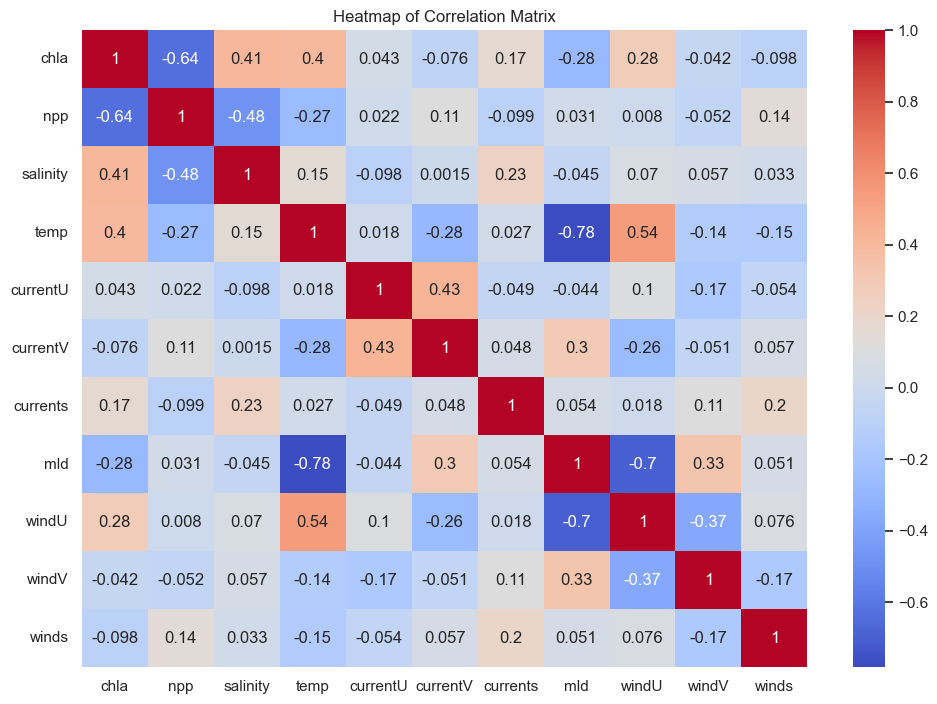

In [167]:
# plot heatmap of feature cols of `df` using seaborn
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()